In [4]:
# !pip install ultralytics==8.3.32

In [19]:
#!pip install scikit-learn

In [20]:
from python_modules.heath_map_builder import HeatMapBuilder

# Uso
Necesitamos el path del modelo y de la imagen. 

In [21]:
model_path = '/Users/rodolfolobocarrasco/Documents/projects/YOLOV5/notebooks/yolov11/runs/detect/andalusite/weights/best.pt'
image_path = "yolov11/datasets/Andalusites/test/images/009-_jpg.rf.1cc0aaf7e984a5c65cbc0e4f1d1601c7.jpg"

Instanciamos el modelo

In [22]:
builder_obj = HeatMapBuilder(model_path)

The Yolo model was successfully loaded


Obtenemos la imagen de referencia

In [23]:
builder_obj.load_image(image_path)

Image successfully loaded


Calculamos el heath map de las layeress combinables

In [24]:
builder_obj.get_heat_map()


0: 1920x2560 7 andalusites, 576.6ms
Speed: 0.0ms preprocess, 576.6ms inference, 13.4ms postprocess per image at shape (1, 3, 1920, 2560)
Generating the heath map ... 
Saved combined heatmap at heatmap_combined.jpg


El objeto tiene en ```raw_heat_map``` el mapa de calor en su forma numérica. 

In [25]:
builder_obj.raw_heat_map

array([[    0.44482,     0.46158,     0.45955, ...,     0.33248,     0.31029,     0.33319],
       [    0.45115,      0.4676,     0.46498, ...,     0.34189,     0.31969,     0.34259],
       [    0.43699,     0.45283,     0.44908, ...,     0.33493,     0.31273,     0.33562],
       ...,
       [    0.32501,     0.32482,     0.32374, ...,     0.36171,     0.36151,     0.36149],
       [    0.31272,     0.31255,     0.31156, ...,     0.35004,     0.34979,     0.34977],
       [    0.31976,      0.3196,     0.31863, ...,     0.35713,     0.35688,     0.35687]], dtype=float32)

## Análisis del mapa de calor

In [26]:
builder_obj.raw_heat_map.shape

(1920, 2560)

In [27]:
from python_modules.cluster_finder import ClusterFinder

In [28]:
# Threshold to find high-value areas
heatmap = builder_obj.raw_heat_map
cluster_finder_obj = ClusterFinder(heatmap)

Successfully initialized


In [29]:
cluster_finder_obj.get_dbscan(threshold = 90)

Image succesfully save


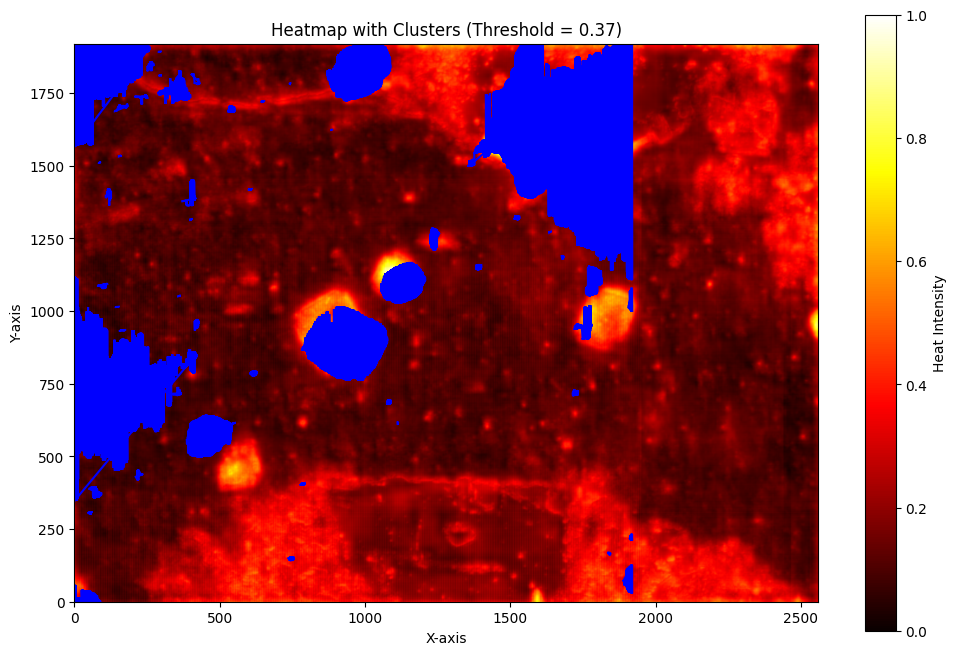

In [30]:
cluster_finder_obj.get_visualization(save_path="./images/cluster.jpg")

Cálculo de la correlación entre los clusters y las zonas más brillantes de la imagen (que justamente son los polígonos en este caso)

In [31]:
cluster_finder_obj.calculate_correlation()

Pearson correlation between cluster values and brighter zones: 0.9999997615814209


0.99999976